In [1]:
from apportionment import *


In [2]:
# Simulation parameters
voters = 1000000
num_seats = 150
nit = 500
group_size = int(0.03 * voters)
link='NRSR2012_clean.csv'
file='1m-raw-2012.csv'

ap = Apportionment(num_seats, voters, link=link) 
print("No of votes from source:", sum(ap.subject_votes.values()))
print("Considered votes:", ap.voters)
print("No. of seats:", num_seats)

#apportionment test
result = ap.divide_seats("slovak")
if not (sum(result.values()) == 150): print(result.values()) 
else: print("seats ok")
if not (sorted(list(result.values())) == [83, 16, 16, 13, 11, 11]): print(result.values()) 
else: print("apport ok")
print("Apportionment should work correctly.")

print("sum of probs:", sum(ap.probabilities.values()))
if not os.path.exists(file):
    ap.iterated_simulate('boxes', file, nit=nit, group_size=group_size)
else:
    print("Simulation did not happen, file already exists!")

No of votes from source: 4392451
Considered votes: 1000000
No. of seats: 150
seats ok
dict_values([16, 16, 11, 83, 13, 11])
Apportionment should work correctly.
sum of probs: 1.0
Simulation did not happen, file already exists!


In [5]:
# Simulation parameters
voters = 1000000
num_seats = 150
nit = 500
group_size = int(0.03 * voters)
link='NRSR2020_clean.csv'
file='1m-2020-fixed.csv'

ap = Apportionment(num_seats, voters, link=link, treshold=lambda x: 7 if x == 12 else 5) 
print("No of votes from source:", sum(ap.subject_votes.values()))
print("Considered votes:", ap.voters)
print("No. of seats:", num_seats)

#apportionment test
result = ap.divide_seats("slovak")
if not (sum(result.values()) == 150): print(result.values()) 
else: print("seats ok")
if not (sorted(list(result.values())) == [12, 13, 17, 17, 38, 53]): print("PROBLEM", result.values()) 
else: print("apport ok")
print("Apportionment should work correctly.")

print("sum of probs:", sum(ap.probabilities.values()))
if not os.path.exists(file):
    ap.iterated_simulate('boxes', file, nit=nit, group_size=group_size)
else:
    print("Simulation did not happen, file already exists!")

No of votes from source: 4432419
Considered votes: 1000000
No. of seats: 150
seats ok
apport ok
Apportionment should work correctly.
sum of probs: 1.0000000000000002
Initializing simulation...
1 / 500
2 / 500
3 / 500
4 / 500
5 / 500
6 / 500
7 / 500
8 / 500
9 / 500
10 / 500
11 / 500
12 / 500
13 / 500
14 / 500
15 / 500
16 / 500
17 / 500
18 / 500
19 / 500
20 / 500
21 / 500
22 / 500
23 / 500
24 / 500
25 / 500
26 / 500
27 / 500
28 / 500
29 / 500
30 / 500
31 / 500
32 / 500
33 / 500
34 / 500
35 / 500
36 / 500
37 / 500
38 / 500
39 / 500
40 / 500
41 / 500
42 / 500
43 / 500
44 / 500
45 / 500
46 / 500
47 / 500
48 / 500
49 / 500
50 / 500
51 / 500
52 / 500
53 / 500
54 / 500
55 / 500
56 / 500
57 / 500
58 / 500
59 / 500
60 / 500
61 / 500
62 / 500
63 / 500
64 / 500
65 / 500
66 / 500
67 / 500
68 / 500
69 / 500
70 / 500
71 / 500
72 / 500
73 / 500
74 / 500
75 / 500
76 / 500
77 / 500
78 / 500
79 / 500
80 / 500
81 / 500
82 / 500
83 / 500
84 / 500
85 / 500
86 / 500
87 / 500
88 / 500
89 / 500
90 / 500
91 / 5

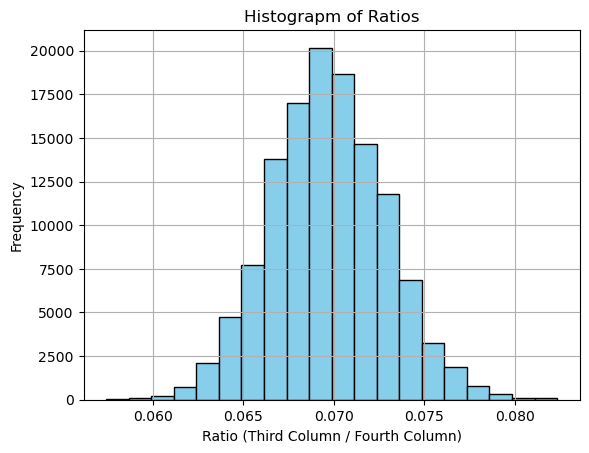

Percentage of ratios greater than 0.07: 44.92%


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram(csv_file_path):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Calculate the ratio of the third column to the fourth column
    ratios = df.iloc[:, 3] / (10000 - df.iloc[:, 2])

    # Plot histogram
    plt.hist(ratios, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Ratio (Third Column / Fourth Column)')
    plt.ylabel('Frequency')
    plt.title('Histograpm of Ratios')
    plt.grid(True)
    plt.show()

    # Calculate ercentage of ratios greater than 0.07
    ratio_gt_007 = (ratios > 0.07).sum()
    total_ratios = len(ratios)
    percentage_gt_007 = (ratio_gt_007 / total_ratios) * 100
    print(f"Percentage of ratios greater than 0.07: {percentage_gt_007:.2f}%")


# Replace 'your_csv_file.csv' with the path to your CSV file
plot_histogram('temp exportos.csv')
